In [1]:
import os
import pandas as pd
import geopandas as gpd
from os.path import join as pjoin
from cartoframes.viz import Map, Layer, color_continuous_style

import numpy as np

In [2]:
sorted(os.listdir('../prepdata'))

['A-traffic-link.csv',
 'LTE_coarse_grid_1000.geojson',
 'LTE_fine_grid_200.geojson',
 'coarse_grained_lte.h5',
 'fine_grained_lte.h5',
 'totalbound_LTE_coarse_grid_1000.geojson',
 'totalbound_LTE_fine_grid_200.geojson',
 'traffic-volume-A-20180101-20190101',
 'traffic-volume-A-20180101-20190101.csv',
 'traffic-volume-A-20180101-20190101.df']

In [3]:
pdir = '../prepdata'

In [4]:
df = pd.read_csv(pjoin(pdir, 'A-traffic-link.csv'), index_col=0)
sensor_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df['경도'], y=df['위도'])
)
sensor_gdf.crs = 'EPSG:4326'


sensor_df = pd.read_csv(pjoin(pdir, 'traffic-volume-A-20180101-20190101.csv'), index_col=0)
tdf = pd.DataFrame(np.nan_to_num(sensor_df.values.astype(np.float32)), columns = sensor_df.columns)
tdf.index = sensor_df.index
sensor_df = tdf

In [5]:
coarse_gdf = gpd.read_file(pjoin(pdir, 'LTE_coarse_grid_1000.geojson'))
fine_gdf = gpd.read_file(pjoin(pdir, 'LTE_fine_grid_200.geojson'))

coarse_df = pd.read_hdf(pjoin(pdir, 'coarse_grained_lte.h5'))
coarse_df.index = sensor_df.index
fine_df = pd.read_hdf(pjoin(pdir, 'fine_grained_lte.h5'))
fine_df.index = sensor_df.index


coarse_df.fillna(0, inplace=True)
fine_df.fillna(0, inplace=True)



fine_zero = np.zeros((1, len(fine_df.columns)), dtype=np.float32)
fine_diff = np.concatenate((fine_zero, np.diff(fine_df.values, axis=0)), 0)
fine_diff_df = pd.DataFrame(fine_diff, columns=fine_df.columns)
fine_diff_df.index = fine_df.index

coarse_zero = np.zeros((1, len(coarse_df.columns)), dtype=np.float32)
coarse_diff = np.concatenate((coarse_zero, np.diff(coarse_df.values, axis=0)), 0)
coarse_diff_df = pd.DataFrame(coarse_diff, columns=coarse_df.columns)
coarse_diff_df.index = coarse_df.index

In [6]:
sensor_ids =sensor_df.columns

In [7]:
sensor_ids

Index(['A-01-I', 'A-01-O', 'A-02-I', 'A-02-O', 'A-03-I', 'A-03-O', 'A-04-I',
       'A-04-O', 'A-05-I', 'A-05-O', 'A-06-I', 'A-06-O', 'A-07-I', 'A-07-O',
       'A-08-I', 'A-08-O', 'A-09-I', 'A-09-O', 'A-10-I', 'A-10-O', 'A-11-I',
       'A-11-O', 'A-12-I', 'A-12-O', 'A-13-I', 'A-13-O', 'A-14-I', 'A-14-O',
       'A-15-I', 'A-15-O', 'A-16-I', 'A-16-O', 'A-17-I', 'A-17-O', 'A-18-I',
       'A-18-O', 'A-19-I', 'A-19-O', 'A-20-I', 'A-20-O', 'A-21-I', 'A-21-O',
       'A-22-I', 'A-22-O', 'A-23-I', 'A-23-O', 'A-24-I', 'A-24-O'],
      dtype='object')

In [8]:
Layer(sensor_gdf[sensor_gdf['지점번호'] == sensor_ids[6][:4]])

In [9]:
coarse_df.index = sensor_df.index
fine_df.index = sensor_df.index

<AxesSubplot: >

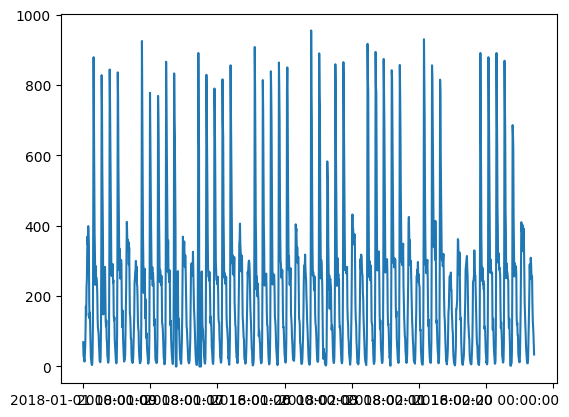

In [10]:
sensor_df[sensor_ids[6]].iloc[:24*7*8].plot()

In [11]:
import matplotlib.pyplot as plt

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [596]:
def f(sid, week):
    plt.figure()
    sensor_name = sensor_ids[sid]
    spoint = sensor_gdf[sensor_gdf['지점번호'] == sensor_name[:4]].iloc[0]
    sensor_df[sensor_name].plot()

    plt.figure()
    igdflist = coarse_gdf[coarse_gdf.intersects(spoint.geometry)]
    for i in range(len(igdflist)):
        tdf = coarse_df[igdflist.iloc[i].cell_idx]
#         tdf = (tdf-tdf.mean())/tdf.std()
        tdf.plot()
        
    plt.figure()
    igdflist = coarse_gdf[coarse_gdf.distance(spoint.geometry) < 0.01]
    for i in range(min(len(igdflist), 9)):
        tdf = coarse_df[igdflist.iloc[i].cell_idx]#.plot()
#         tdf = (tdf-tdf.mean())/tdf.std()
        tdf.plot()
        
        
        
    plt.figure()
    igdflist = fine_gdf[fine_gdf.intersects(spoint.geometry)]
    for i in range(len(igdflist)):
        tdf = fine_df[igdflist.iloc[i].cell_idx]#.plot()
#         tdf = (tdf-tdf.mean())/tdf.std()
        tdf.plot()
        
    plt.figure()
    igdflist = fine_gdf[fine_gdf.distance(spoint.geometry) < 0.01]
    for i in range(min(len(igdflist), 9)):
        tdf = fine_df[igdflist.iloc[i].cell_idx]#.plot()
        tdf = (tdf-tdf.mean())/tdf.std()
        tdf.plot()
        

interact(f, sid=(0, len(sensor_ids)-1), week=(0, len(sensor_df)//24//7-1));

interactive(children=(IntSlider(value=23, description='sid', max=47), IntSlider(value=25, description='week', …

/tmp/ipykernel_295287/1707987632.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  igdflist = coarse_gdf[coarse_gdf.distance(spoint.geometry) < 0.01]


KeyError: "['val'] not in index"

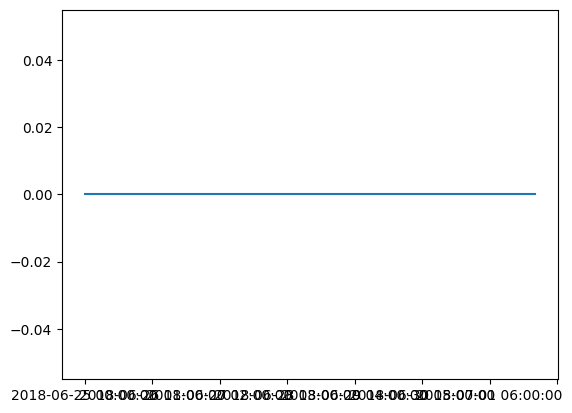

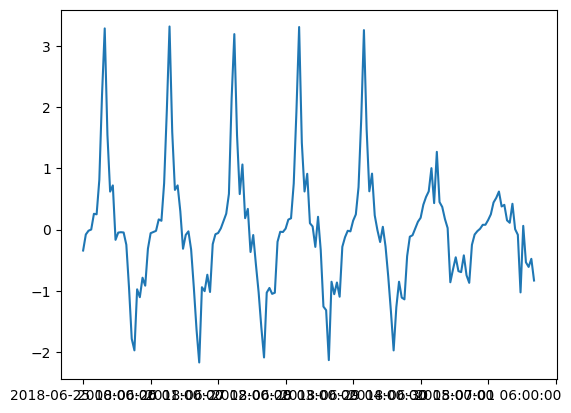

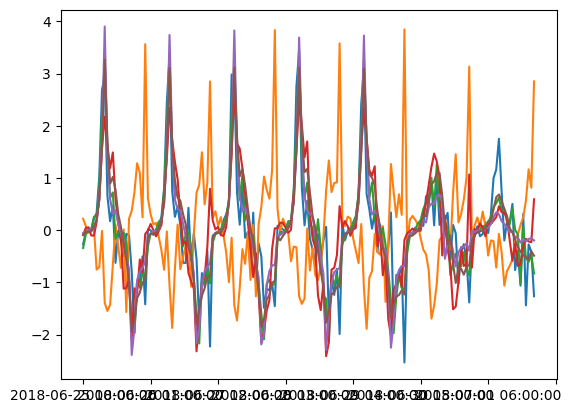

In [593]:
sid=23
week=25
plt.figure()
sensor_name = sensor_ids[sid]
spoint = sensor_gdf[sensor_gdf['지점번호'] == sensor_name[:4]].iloc[0]
sensor_df[sensor_name].iloc[24*7*week:24*7*(week+1)].plot()

plt.figure()
igdflist = coarse_gdf[coarse_gdf.intersects(spoint.geometry)]
for i in range(len(igdflist)):
    tdf = coarse_diff_df[igdflist.iloc[i].cell_idx].iloc[24*7*week:24*7*(week+1)]
    tdf = (tdf-tdf.mean())/tdf.std()
    tdf.plot()

plt.figure()
igdflist = coarse_gdf[coarse_gdf.distance(spoint.geometry) < 0.01]
for i in range(min(len(igdflist), 9)):
    tdf = coarse_diff_df[igdflist.iloc[i].cell_idx].iloc[24*7*week:24*7*(week+1)]#.plot()
    tdf = (tdf-tdf.mean())/tdf.std()
    tdf.plot()

display(
    Map([
        Layer(igdflist, color_continuous_style('val')),
        Layer(sensor_gdf[sensor_gdf['지점번호'] == sensor_name[:4]]),
    ])
)


plt.figure()
igdflist = fine_gdf[fine_gdf.intersects(spoint.geometry)]
for i in range(len(igdflist)):
    tdf = fine_diff_df[igdflist.iloc[i].cell_idx].iloc[24*7*week:24*7*(week+1)]#.plot()
    tdf = (tdf-tdf.mean())/tdf.std()
    tdf.plot()

plt.figure()
igdflist = fine_gdf[fine_gdf.distance(spoint.geometry) < 0.01]
for i in range(min(len(igdflist), 9)):
    tdf = fine_diff_df[igdflist.iloc[i].cell_idx].iloc[24*7*week:24*7*(week+1)]#.plot()
    tdf = (tdf-tdf.mean())/tdf.std()
    tdf.plot()


In [15]:
sensor_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
coarse_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

AOE
- 15,10
- 18,27

In [ ]:
cids = ['15,10', '18,27']
Layer(fine_gdf[fine_gdf['cell_idx'].isin(cids)])

In [72]:
coarse_gdf[coarse_gdf.contains(sensor_gdf[sensor_gdf['지점번호'] == sensor_ids[6][:4]])]

/home/smhan/miniconda3/envs/TF/lib/python3.7/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,cell_idx,geometry,val


In [64]:
spoint

지점번호                                A-04
지점명칭                          대사관로(삼청터널)
위도                             37.596359
경도                            126.984209
주소                   서울시 성북구 성북동 산25-148
도로명 주소                               NaN
유입방향                    [삼청로]삼청각->삼청공원입구
유입링크                          1000020100
유출방향                    [삼청로]삼청공원입구->삼청각
유출링크                          1000020200
geometry    POINT (126.984209 37.596359)
Name: 3, dtype: object

In [44]:
coarse_gdf['val'] = coarse_df.mean(0).values
fine_gdf['val'] = fine_df.mean(0).values

In [8]:
Map([
    Layer(coarse_gdf, color_continuous_style('val')),
    Layer(sensor_gdf),
])


In [9]:
Map([
    Layer(fine_gdf, color_continuous_style('val')),
    Layer(sensor_gdf),
])


In [10]:
coarse_gdf['val'] = coarse_df.mean(0).values

In [15]:
coarse_df.mean(0).values

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
coarse_df

,"0,0","0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8","0,9",...,"30,28","30,29","30,30","30,31","30,32","30,33","30,34","30,35","30,36","30,37"
2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.908359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.335173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.495228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.641601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.534897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.989077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.082097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.228470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.481545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
s

,지점번호,지점명칭,위도,경도,주소,도로명 주소,유입방향,유입링크,유출방향,유출링크,geometry
0,A-01,성산로(금화터널),37.568588,126.948436,서울시 서대문구 신촌동 1-142,NaN,[성산로]봉원고가차도->독립문역,1120006400,[성산로]독립문역->봉원고가차도,1120006300,POINT (126.94844 37.56859)
1,A-02,사직로(사직터널),37.572298,126.962853,서울시 종로구 행촌동 1-186,NaN,[사직로]독립문역->사직단,1000008000,[사직로]사직단->독립문역,1000007900,POINT (126.96285 37.57230)
2,A-03,자하문로(자하문터널),37.588831,126.968548,서울시 종로구 청운동 24-6,NaN,[자하문로]석파정->청운초등학교,1000019500,[자하문로]청운초등학교->석파정,1000019600,POINT (126.96855 37.58883)
3,A-04,대사관로(삼청터널),37.596359,126.984209,서울시 성북구 성북동 산25-148,NaN,[삼청로]삼청각->삼청공원입구,1000020100,[삼청로]삼청공원입구->삼청각,1000020200,POINT (126.98421 37.59636)
4,A-05,율곡로(안국역),37.576000,126.984342,서울시 종로구 경운동 90-4,서울시 종로구 율곡로 46,[율곡로]안국역->안국동사거리,1000012700,[율곡로]안국동사거리->안국역,1000012800,POINT (126.98434 37.57600)
5,A-06,창경궁로(서울여자대학교),37.582526,126.998011,서울시 종로구 명륜4가 197-5,NaN,[창경궁로]성균관대입구->원남동사거리,1000015500,[창경궁로]원남동사거리->성균관대입구,1000015600,POINT (126.99801 37.58253)
6,A-07,대학로(한국방송통신대학교),37.578188,127.002053,서울시 종로구 연건동 72-3,NaN,[대학로]혜화동로터리->이화사거리,1000015900,[대학로]이화사거리->혜화동로터리,1000016000,POINT (127.00205 37.57819)
7,A-08,종로(동묘앞역),37.573262,127.017112,서울시 종로구 숭인동 273,서울시 종로구 종로 358,[종로]신설동역->동묘앞역,1000002300,[종로]동묘앞역->신설동역,1000002400,POINT (127.01711 37.57326)
8,A-09,퇴계로(신당역),37.565712,127.020912,서울시 중구 황학동 710,서울시 중구 퇴계로 443,[퇴계로]상왕십리역->신당역,1010013200,[퇴계로]신당역->상왕십리역,1010013100,POINT (127.02091 37.56571)
9,A-10,동호로(장충체육관),37.558563,127.007101,서울시 중구 장충동2가 200-99,서울시 중구 동호로 233-1,[동호로]약수역->장충체육관,1010001600,[동호로]장충체육관->약수역,1010001500,POINT (127.00710 37.55856)


In [83]:
fine_df.iloc[0]

0,0      1226.883868
0,1      2488.521966
0,2      1966.959948
0,3      6988.422713
0,4      2977.021899
            ...     
29,28    3155.707786
29,29    2241.208284
29,30    2262.208969
29,31    1948.187338
29,32    1413.043146
Name: 2018-01-01 00:00:00, Length: 990, dtype: float64

In [86]:
import matplotlib.pyplot as plt

60665.16533895023

array([[1226.88386811, 2488.52196561, 1966.95994772, ..., 2262.208969  ,
        1948.18733781, 1413.04314649],
       [1230.73970053, 2441.54501742, 2022.0096243 , ..., 2285.77966633,
        1848.17487318, 1394.81196302],
       [1240.761542  , 2482.72823391, 2093.433556  , ..., 2256.65174528,
        1845.47099709, 1387.97251146],
       ...,
       [ 803.79835354, 4179.13940722, 2925.31205205, ..., 4229.51366755,
         995.0422373 , 1410.43631192],
       [ 794.25229642, 4355.93023955, 3073.12716324, ..., 4023.37631919,
        1036.87619875, 1398.93751614],
       [ 735.42819037, 3702.73469146, 3283.99785995, ..., 2990.92378096,
        1353.3869158 , 1460.18286839]])

In [111]:
import numpy as np

In [141]:
wkdy = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [194]:
dt = fine_df.index[i]
dt.strftime("%Y/%m/%d, %HH")

'2018/01/07, 23H'

<Figure size 576x576 with 0 Axes>

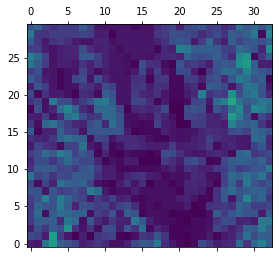

In [225]:
fig = plt.figure(figsize=(8,8), facecolor='blue')
plt.matshow(arr[i], vmin=arr.min(), vmax=arr.max())
plt.gca().invert_yaxis()
plt.gcf().set_facecolor("#FFFFFF")

In [244]:
for i in np.arange(1, 13) * (255/12):
    print(hex(int(i)))
    
for i in np.arange(11, -1, -1) * (255/12):
    print(hex(int(i)))

0x15
0x2a
0x3f
0x55
0x6a
0x7f
0x94
0xaa
0xbf
0xd4
0xe9
0xff
0xe9
0xd4
0xbf
0xaa
0x94
0x7f
0x6a
0x55
0x3f
0x2a
0x15
0x0


In [245]:
hex_list = '''
15
2a
3f
55
6a
7f
94
aa
bf
d4
e9
ff
e9
d4
bf
aa
94
7f
6a
55
3f
2a
15
00'''
hex_list = hex_list.split()


In [262]:
import imageio

def make_gif(arr, save_dir, gifname, start_idx, end_idx):
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    temp_dir = pjoin(save_dir, 'temp', gifname)
    if not os.path.isdir(temp_dir):
        os.makedirs(temp_dir)
    
    fnames = []
    for i in range(start_idx, end_idx):
        plt.matshow(arr[i], vmin=arr.min(), vmax=arr.max())
        plt.gca().invert_yaxis()
        dt = fine_df.index[i]
        
        
        plt.gcf().set_facecolor(f"#{hex_list[dt.hour]*2}FF")
        
        fname = f'{dt.strftime("%Y-%m-%d %HH")} ({wkdy[dt.weekday()]}).png'
        plt.title(f'{dt.strftime("%Y-%m-%d %HH")} ({wkdy[dt.weekday()]})')
        plt.colorbar()
        plt.savefig(pjoin(temp_dir, fname))
        fnames.append(pjoin(temp_dir, fname))
        plt.close()

    
    # Build GIF
    with imageio.get_writer(pjoin(save_dir, f'{gifname}.gif'), mode='I') as writer:
        for filename in fnames:
            image = imageio.imread(filename)
            writer.append_data(image)

In [263]:
fine_vals = fine_df.values
fine_vals = np.log10(fine_vals+1)
fine_vals = fine_vals.reshape(-1, 30, 33)
make_gif(fine_vals, 'gif', 'fine_log10', 24*7, 24*7*2)

coarse_vals = coarse_df.values
coarse_vals = np.log10(coarse_vals+1)
coarse_vals = coarse_vals.reshape(-1, 31, 38)
make_gif(coarse_vals, 'gif', 'coarse_log10', 24*7, 24*7*2)


fine_diff = np.diff(fine_df.values, axis=0)
fine_diff = fine_diff.reshape(-1, 30, 33)
make_gif(fine_diff, 'gif', 'fine_diff', 24*7, 24*7*2)


coarse_diff = np.diff(coarse_df.values, axis=0)
coarse_diff = coarse_diff.reshape(-1, 31, 38)
make_gif(coarse_diff, 'gif', 'coarse_diff', 24*7, 24*7*2)


fine_diff = np.diff(fine_df.values, axis=0)
fine_diff = fine_diff.reshape(-1, 30, 33)
fine_diff = np.sign(fine_diff) * np.log10(np.abs(fine_diff)+1)
make_gif(fine_diff, 'gif', 'fine_log10_diff', 24*7, 24*7*2)


coarse_diff = np.diff(coarse_df.values, axis=0)
coarse_diff = coarse_diff.reshape(-1, 31, 38)
coarse_diff = np.sign(coarse_diff) * np.log10(np.abs(coarse_diff)+1)
make_gif(coarse_diff, 'gif', 'coarse_log10_diff', 24*7, 24*7*2)

/home/smhan/miniconda3/envs/TF/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


In [17]:
fine_df.iloc[:24*7]

,"0,0","0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8","0,9",...,"29,23","29,24","29,25","29,26","29,27","29,28","29,29","29,30","29,31","29,32"
2018-01-01 00:00:00,1226.883868,2488.521966,1966.959948,6988.422713,2977.021899,2160.198625,817.639970,504.681288,514.132379,760.630589,...,769.698662,241.164390,93.923983,554.333079,1833.408358,3155.707786,2241.208284,2262.208969,1948.187338,1413.043146
2018-01-01 01:00:00,1230.739701,2441.545017,2022.009624,6696.596501,3068.957871,2194.415054,843.443163,511.350144,521.174037,770.994935,...,797.880435,256.292765,98.080708,569.738131,1858.427186,3227.005701,2224.648129,2285.779666,1848.174873,1394.811963
2018-01-01 02:00:00,1240.761542,2482.728234,2093.433556,6638.373262,3073.527515,2178.008476,865.525674,520.399199,529.004346,782.999539,...,794.994882,252.112858,98.086746,575.554942,1877.926147,3227.421380,2246.218645,2256.651745,1845.470997,1387.972511
2018-01-01 03:00:00,1246.349340,2498.565629,2100.989022,6591.604780,3076.905211,2193.021131,873.576886,524.269007,524.461428,779.926984,...,789.249503,253.964676,99.630555,578.084752,1895.820644,3240.204961,2260.546756,2278.882394,1843.839012,1362.058092
2018-01-01 04:00:00,1248.116622,2511.685487,2123.710065,6672.410007,3115.947620,2223.410812,873.707325,528.044418,525.208675,776.633679,...,793.184339,254.824216,99.100369,577.347616,1919.896557,3274.425011,2281.629982,2325.164651,1846.542757,1327.194004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-07 19:00:00,822.956128,3445.126060,1745.942026,6556.456213,840.758930,632.104981,301.169830,452.703895,852.443639,715.657342,...,826.543482,294.404010,139.473509,209.436018,1767.137596,2921.530203,2042.205747,3457.396824,1279.921833,1575.372936
2018-01-07 20:00:00,908.014097,3162.552151,1873.452128,6953.070039,1539.851801,1167.248641,453.623429,472.650662,781.029677,741.640407,...,872.781241,290.166489,129.897099,325.917531,1661.793495,2660.267794,1933.852217,3421.811019,1355.978032,1567.192176
2018-01-07 21:00:00,977.080223,3005.850351,2082.661132,7279.869326,2362.572571,1840.878441,665.982304,511.315879,676.212935,748.502959,...,905.376578,278.311717,117.711567,504.704631,1785.339057,2637.511624,1972.646531,3448.408747,1508.176598,1519.553259
2018-01-07 22:00:00,1048.138692,2838.519062,2279.452394,7262.573660,2821.532172,2209.221466,768.830384,522.508516,597.672042,739.565557,...,914.932802,275.195303,115.884030,576.699037,1896.360823,2823.268504,2035.975085,3310.538109,1649.805360,1453.252572


In [18]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [20]:
# fine_vals = fine_df.iloc[:24*7].values

In [258]:
fine_vals = fine_df.values[:24*7*3]
fine_diff = np.diff(fine_vals, axis=0) / (fine_vals[:-1] + 1)

In [259]:
fine_xys = []
for i, j in fine_df.columns.str.split(','):
    fine_xys.append((int(i), int(j)))
fine_cat = np.concatenate((np.array(fine_xys).T, fine_diff), 0)

In [260]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [261]:
distmat = np.random.random((10, 10))

In [262]:
from scipy.stats import pearsonr

In [266]:
num_cells = fine_cat.shape[1]
distmat = np.zeros((num_cells, num_cells))
for i in range(num_cells):
    for j in range(i,num_cells):
        xs = fine_cat[:, i]
        ys = fine_cat[:, j]
        
        d1 = ((xs[0]-ys[0])**2 + (xs[1]-ys[1])**2)**2
        dval = 5
        if d1 < 5:
            #dval = np.linalg.norm((xs[2:] - ys[2:]), ord=2)
            dval = (1 - pearsonr(xs[2:], ys[2:]).statistic)/2 + d1/5
        distmat[i,j] = distmat[j,i] = dval

# clusters: 576
count 30


/home/smhan/.conda/envs/TF2/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


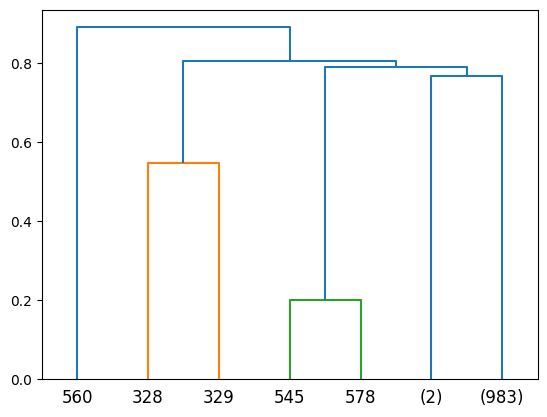

In [293]:
import numpy as np
#import metaplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
clustering2 = AgglomerativeClustering(distance_threshold=0.25, n_clusters=None, affinity='precomputed', linkage="single")
clustering2.fit(distmat)

# print(clustering2.labels_)
plot_dendrogram(clustering2, truncate_mode='level', p=3)


labdict = dict()
for i, lab in enumerate(clustering2.labels_):
    labdict.setdefault(lab, [])
    labdict[lab].append(i)
    
print('# clusters:', len(labdict))
count = 0
for lab in labdict:
    if len(labdict[lab]) >= 5:
#         print(lab, len(labdict[lab]), labdict[lab], sep='\t')
        count+=1
print('count', count)

In [597]:
item_list = []
nlabel = 0
for lab in labdict:
    if len(labdict[lab]) > 4:
        print(lab, len(labdict[lab]), labdict[lab], sep='\t')
        for i in labdict[lab]:
            item = dict(fine_gdf.iloc[i])
            item['label'] = str(nlabel)
            item_list.append(item)
        nlabel += 1
            
            
fine_lab = gpd.GeoDataFrame(item_list)
# fine_lab.plot('label')
Layer(fine_lab, color_category_style('label'))

31	8	[19, 20, 21, 52, 53, 54, 85, 86]
63	8	[22, 55, 56, 87, 88, 89, 121, 122]
123	6	[24, 57, 58, 59, 90, 123]
39	5	[115, 147, 148, 180, 181]
3	25	[119, 120, 152, 153, 154, 155, 185, 186, 187, 188, 218, 219, 220, 221, 222, 252, 253, 254, 255, 286, 287, 288, 319, 352, 353]
28	12	[183, 184, 215, 216, 217, 248, 249, 250, 282, 283, 284, 317]
45	6	[279, 312, 313, 314, 346, 347]
15	19	[321, 322, 351, 354, 355, 383, 384, 385, 386, 387, 388, 389, 416, 417, 420, 421, 422, 449, 450]
53	7	[363, 364, 396, 397, 398, 430, 431]
98	6	[381, 382, 414, 415, 447, 448]
2	5	[432, 465, 497, 498, 499]
61	5	[442, 443, 474, 475, 476]
42	5	[457, 458, 489, 490, 491]
195	23	[471, 472, 473, 503, 504, 505, 506, 507, 508, 536, 537, 538, 539, 540, 572, 573, 604, 605, 606, 637, 638, 670, 671]
122	7	[509, 510, 511, 512, 542, 543, 544]
55	13	[555, 556, 588, 589, 620, 621, 622, 653, 654, 655, 656, 686, 687]
7	5	[579, 580, 610, 611, 612]
108	7	[608, 609, 641, 642, 643, 674, 675]
186	15	[617, 646, 647, 648, 649, 650, 679, 68

In [299]:
fine_df

,"0,0","0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8","0,9",...,"29,23","29,24","29,25","29,26","29,27","29,28","29,29","29,30","29,31","29,32"
2018-01-01 00:00:00,1226.883868,2488.521966,1966.959948,6988.422713,2977.021899,2160.198625,817.639970,504.681288,514.132379,760.630589,...,769.698662,241.164390,93.923983,554.333079,1833.408358,3155.707786,2241.208284,2262.208969,1948.187338,1413.043146
2018-01-01 01:00:00,1230.739701,2441.545017,2022.009624,6696.596501,3068.957871,2194.415054,843.443163,511.350144,521.174037,770.994935,...,797.880435,256.292765,98.080708,569.738131,1858.427186,3227.005701,2224.648129,2285.779666,1848.174873,1394.811963
2018-01-01 02:00:00,1240.761542,2482.728234,2093.433556,6638.373262,3073.527515,2178.008476,865.525674,520.399199,529.004346,782.999539,...,794.994882,252.112858,98.086746,575.554942,1877.926147,3227.421380,2246.218645,2256.651745,1845.470997,1387.972511
2018-01-01 03:00:00,1246.349340,2498.565629,2100.989022,6591.604780,3076.905211,2193.021131,873.576886,524.269007,524.461428,779.926984,...,789.249503,253.964676,99.630555,578.084752,1895.820644,3240.204961,2260.546756,2278.882394,1843.839012,1362.058092
2018-01-01 04:00:00,1248.116622,2511.685487,2123.710065,6672.410007,3115.947620,2223.410812,873.707325,528.044418,525.208675,776.633679,...,793.184339,254.824216,99.100369,577.347616,1919.896557,3274.425011,2281.629982,2325.164651,1846.542757,1327.194004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,829.289987,3939.994589,2617.262944,8251.261221,1951.606014,2681.791335,648.398650,363.696747,436.024983,528.611574,...,1826.808553,556.146064,138.356688,456.229788,1485.431910,2192.255608,1583.708181,4238.069313,868.167172,1417.102493
2018-12-31 20:00:00,829.011468,4118.370261,2852.389584,8208.629557,2165.536902,2815.400890,697.154016,379.623807,423.606036,538.565930,...,1855.834132,581.785328,142.369550,495.916398,1447.679543,2190.881678,1614.473104,4307.909506,920.736686,1403.498846
2018-12-31 21:00:00,803.798354,4179.139407,2925.312052,8361.542012,2339.840619,3029.705646,759.905081,393.846392,407.221570,535.815859,...,1904.299656,611.478351,146.467299,554.612413,1461.886036,2185.210504,1622.612153,4229.513668,995.042237,1410.436312
2018-12-31 22:00:00,794.252296,4355.930240,3073.127163,8499.111206,2572.512034,3303.975932,850.368221,423.118489,384.259538,520.934742,...,1853.272910,617.370933,150.664022,580.108785,1428.497457,2187.887297,1649.964779,4023.376319,1036.876199,1398.937516


In [498]:
sensor_vals = sensor_df.iloc[:24*7*10].values

In [507]:
sid_list = []
for sid, val in enumerate(np.sum(sensor_vals == 0, 0)):
    if val < 1000:
        sid_list.append(sensor_df.columns[sid])

In [575]:
fine_vals = fine_df[fine_df.columns[i]].values

In [579]:
values

array([609.4614444 , 658.04061052, 666.97611181, ..., 358.03684938,
       384.83984109, 559.74753414])

array([ 48.57916611,   8.93550129,   6.97237346, ...,  31.10613471,
        26.80299171, 174.90769305])

array([0.07382396, 0.01339703, 0.01034556, ..., 0.0868797 , 0.06964713,
       0.31247604])

45	6	[279, 312, 313, 314, 346, 347]


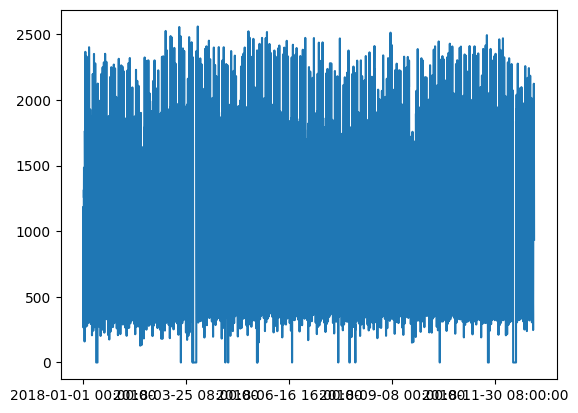

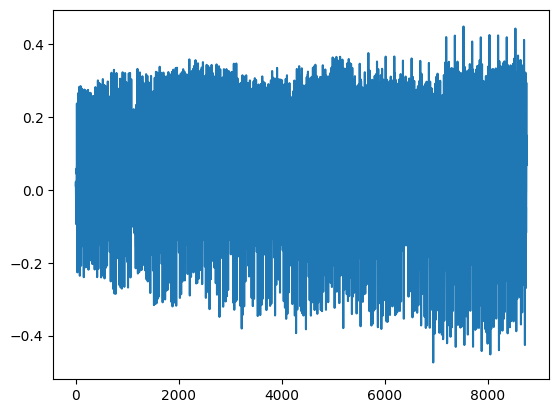

In [592]:
week = 18
sid = 1
lid = 6

#.iloc[24*7*week:24*7*(week+1)]
sensor_df[sensor_df.columns[sid]].plot()


item_list = []
nlabel = 0
skip=lid

for lab in labdict:
        
    if len(labdict[lab]) > 4:
        if skip > 0:
            skip -= 1
            continue
        plt.figure()
        
        print(lab, len(labdict[lab]), labdict[lab], sep='\t')
        values = []
        for i in labdict[lab]:
            values.append(fine_df[fine_df.columns[i]].values)
            
        values = np.sum(values, 0)
        diff_per_values = np.diff(values) / values[1:]
        #plt.plot(np.diff(values, axis=0))
        plt.plot(diff_per_values)
        nlabel += 1
        
        
        break

In [243]:
from cartoframes.viz import Layer, color_category_style

In [192]:
fine_gdf

,cell_idx,geometry
0,"0,0","POLYGON ((126.95021 37.54230, 126.95021 37.544..."
1,"0,1","POLYGON ((126.95248 37.54230, 126.95247 37.544..."
2,"0,2","POLYGON ((126.95474 37.54230, 126.95474 37.544..."
3,"0,3","POLYGON ((126.95700 37.54230, 126.95700 37.544..."
4,"0,4","POLYGON ((126.95926 37.54230, 126.95926 37.544..."
...,...,...
985,"29,28","POLYGON ((127.01359 37.59457, 127.01359 37.596..."
986,"29,29","POLYGON ((127.01585 37.59457, 127.01585 37.596..."
987,"29,30","POLYGON ((127.01812 37.59457, 127.01812 37.596..."
988,"29,31","POLYGON ((127.02038 37.59457, 127.02038 37.596..."


{534: [0],
 777: [1],
 712: [2],
 731: [3],
 450: [4],
 578: [5],
 474: [6],
 32: [7, 8],
 688: [9],
 478: [10],
 677: [11],
 637: [12],
 508: [13],
 131: [14, 15],
 527: [16],
 31: [17, 50],
 632: [18],
 727: [19],
 552: [20],
 404: [21],
 724: [22],
 487: [23],
 621: [24],
 641: [25],
 616: [26],
 129: [27, 28],
 773: [29],
 521: [30],
 618: [31],
 530: [32],
 735: [33],
 462: [34],
 715: [35],
 258: [36, 37],
 517: [38],
 15: [39, 40],
 756: [41],
 63: [42, 43],
 719: [44],
 122: [45, 78],
 256: [46, 47],
 127: [48, 49],
 593: [51],
 438: [52],
 555: [53],
 594: [54],
 448: [55],
 722: [56],
 528: [57],
 507: [58],
 631: [59],
 252: [60, 61],
 516: [62],
 125: [63, 64],
 502: [65],
 124: [66, 67],
 424: [68],
 499: [69],
 725: [70],
 248: [71, 72],
 497: [73],
 605: [74],
 495: [75],
 60: [76, 77],
 762: [79],
 730: [80],
 245: [81, 82],
 728: [83],
 642: [84],
 415: [85],
 573: [86],
 629: [87],
 542: [88],
 603: [89],
 121: [90, 91],
 58: [92, 125],
 770: [93],
 486: [94],
 647: [

In [79]:
dn

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 3.0, 3.0, 0.0],
  [0.0, 4.0, 4.0, 3.0],
  [0.0, 5.0, 5.0, 4.0]],
 'ivl': ['3', '2', '4', '0', '1'],
 'leaves': [3, 2, 4, 0, 1],
 'color_list': ['C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1']}